In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!pip install yfinance
!pip install yahoofinancials

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials

df = yf.download('BKNG', 
                      start='2000-02-10', 
                      end='2022-02-20', 
                      progress=False,
)
print(test_set)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-02-22  2588.459961  2617.750000  2486.840088  2518.219971  2518.219971   
2022-02-23  2536.729980  2556.760010  2465.010010  2469.830078  2469.830078   
2022-02-24  2161.610107  2297.550049  2138.719971  2295.000000  2295.000000   
2022-02-25  2319.260010  2336.719971  2250.010010  2281.459961  2281.459961   
2022-02-28  2241.800049  2241.800049  2153.659912  2172.250000  2172.250000   
2022-03-01  2148.449951  2148.449951  2063.229980  2072.000000  2072.000000   
2022-03-02  2091.159912  2193.310059  2088.679932  2163.520020  2163.520020   
2022-03-03  2173.090088  2198.020020  2089.889893  2102.060059  2102.060059   
2022-03-04  2048.290039  2059.969971  1963.709961  1985.040039  1985.040039   
2022-03-07  1970.260010  1979.050049  1815.969971  1817.160034  1817.160034   
2022-03-08  1843.390015  1981.780029  1796.449951  1

In [ ]:
print(df.head())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-02-22  2588.459961  2617.750000  2486.840088  2518.219971  2518.219971   
2022-02-23  2536.729980  2556.760010  2465.010010  2469.830078  2469.830078   
2022-02-24  2161.610107  2297.550049  2138.719971  2295.000000  2295.000000   
2022-02-25  2319.260010  2336.719971  2250.010010  2281.459961  2281.459961   
2022-02-28  2241.800049  2241.800049  2153.659912  2172.250000  2172.250000   

             Volume  
Date                 
2022-02-22   513400  
2022-02-23   518000  
2022-02-24  1518100  
2022-02-25   546100  
2022-02-28   817700  


In [ ]:
matrix = df.corr()
print(matrix)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.968191  0.974095  0.926533   0.926533 -0.425731
High       0.968191  1.000000  0.976022  0.974023   0.974023 -0.331769
Low        0.974095  0.976022  1.000000  0.974849   0.974849 -0.489932
Close      0.926533  0.974023  0.974849  1.000000   1.000000 -0.389569
Adj Close  0.926533  0.974023  0.974849  1.000000   1.000000 -0.389569
Volume    -0.425731 -0.331769 -0.489932 -0.389569  -0.389569  1.000000


In [ ]:
matrix = df.corr().round(2)
print(matrix)

           Open  High   Low  Close  Adj Close  Volume
Open       1.00  0.97  0.97   0.93       0.93   -0.43
High       0.97  1.00  0.98   0.97       0.97   -0.33
Low        0.97  0.98  1.00   0.97       0.97   -0.49
Close      0.93  0.97  0.97   1.00       1.00   -0.39
Adj Close  0.93  0.97  0.97   1.00       1.00   -0.39
Volume    -0.43 -0.33 -0.49  -0.39      -0.39    1.00


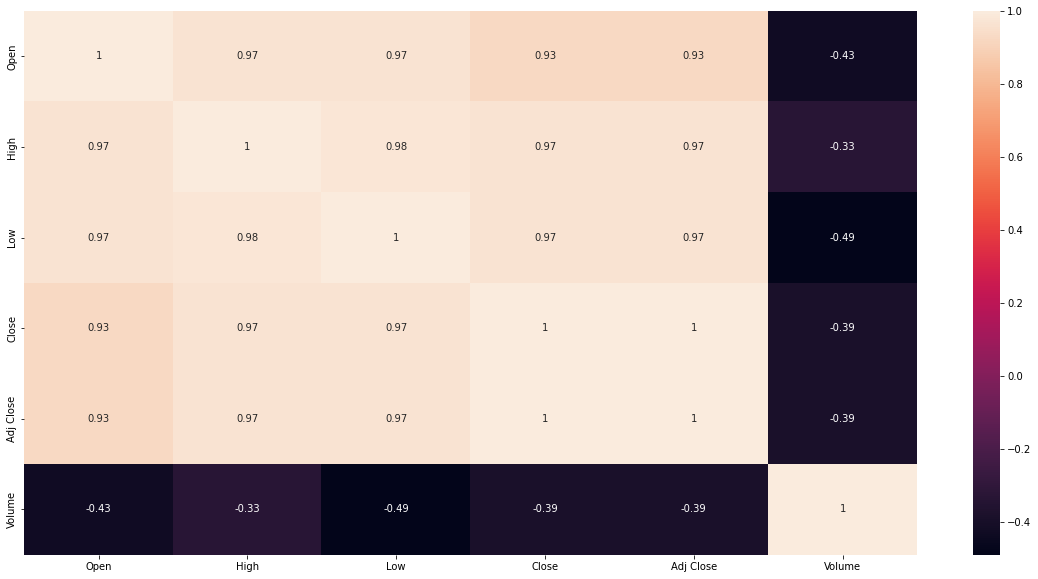

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = yf.download('BKNG', 
                      start='2000-02-10', 
                      end='2022-02-20', 
                      progress=False,
)
df = yf.download('BKNG', 
                      start='2022-02-21', 
                      end='2022-04-20', 
                      progress=False,
)
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

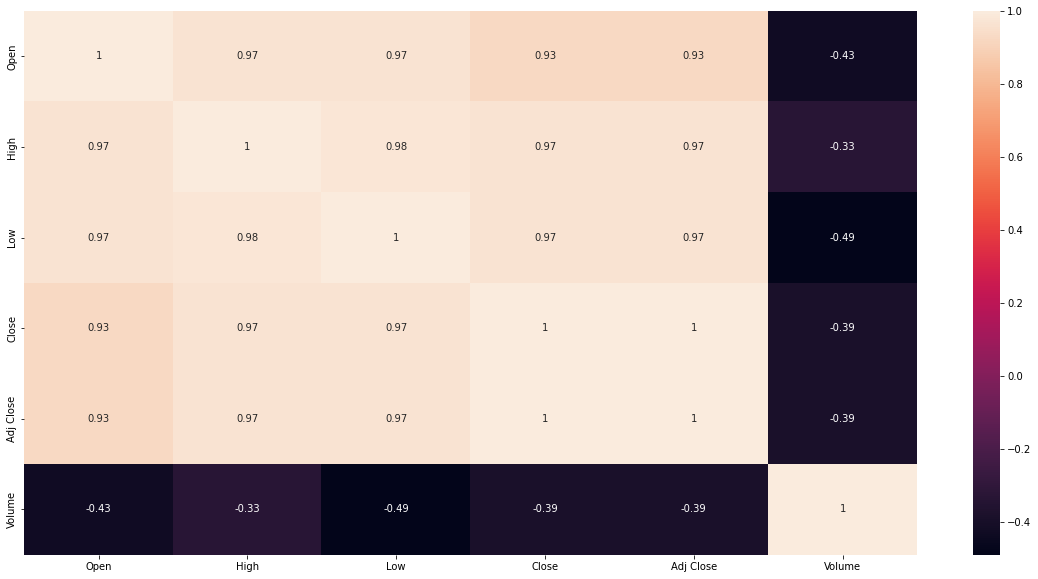

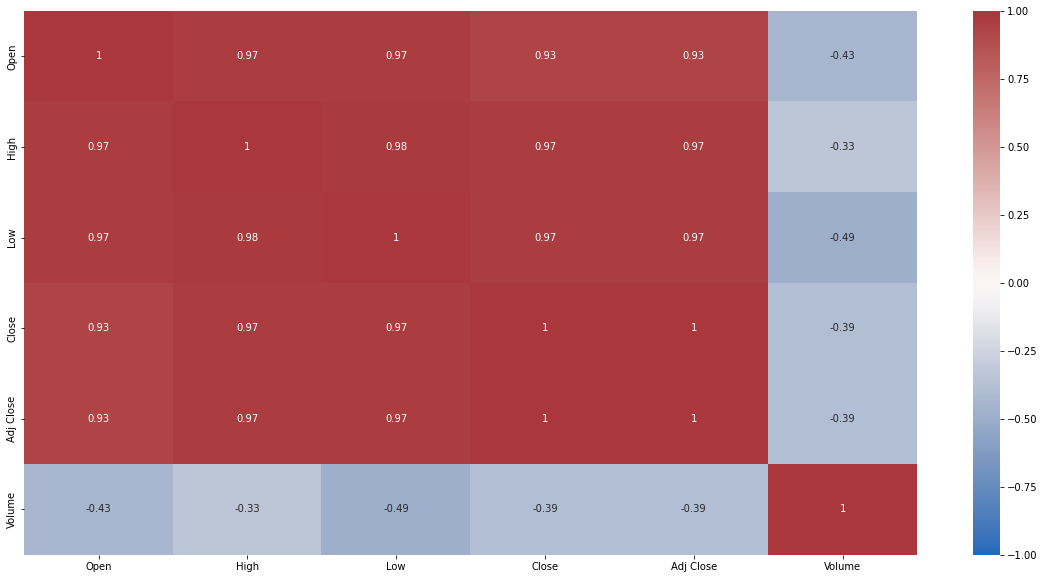

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = yf.download('BKNG', 
                      start='2000-02-10', 
                      end='2022-02-20', 
                      progress=False,
)
df = yf.download('BKNG', 
                      start='2022-02-21', 
                      end='2022-04-20', 
                      progress=False,
)
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

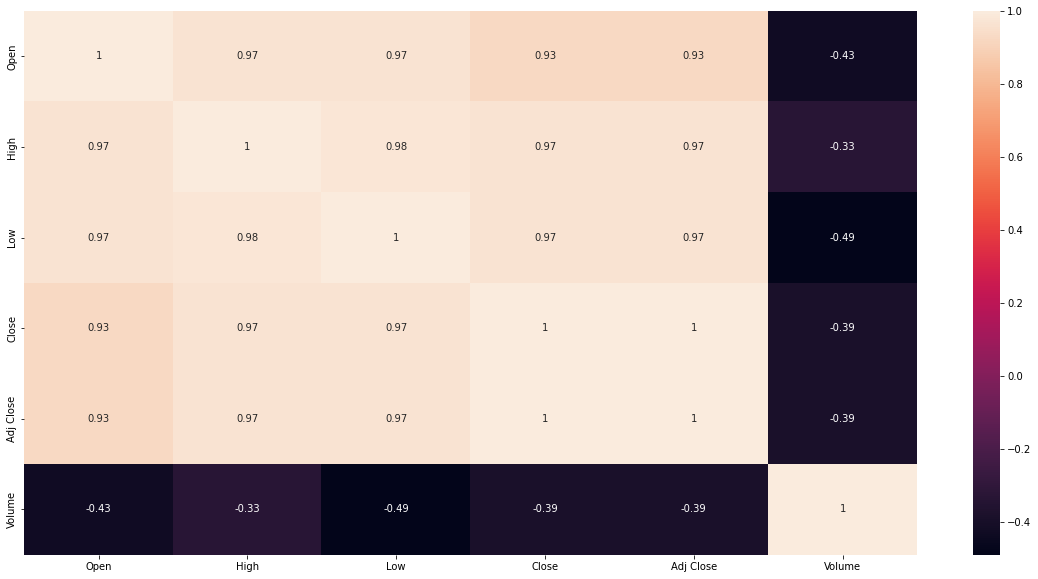

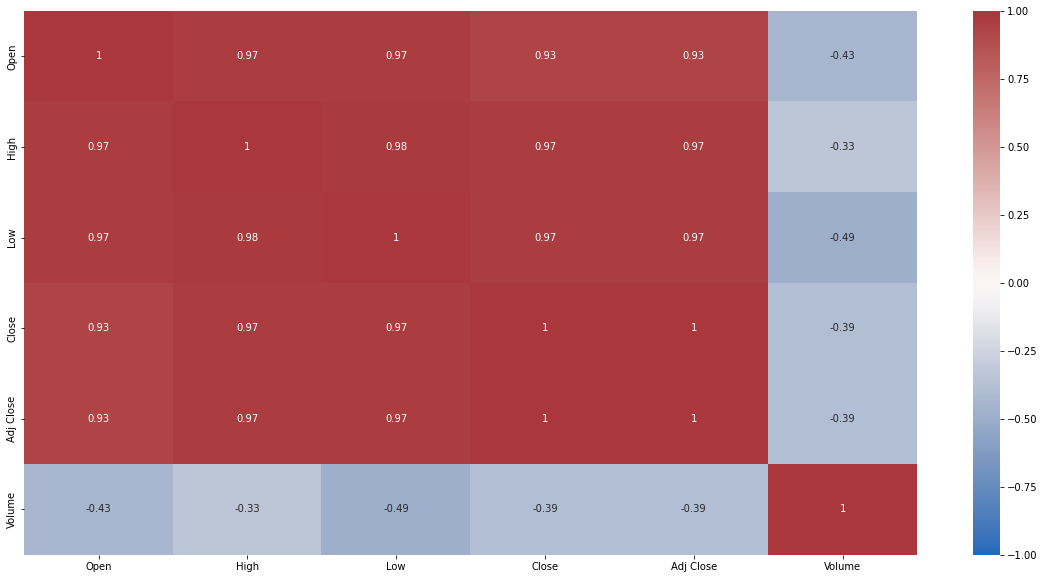

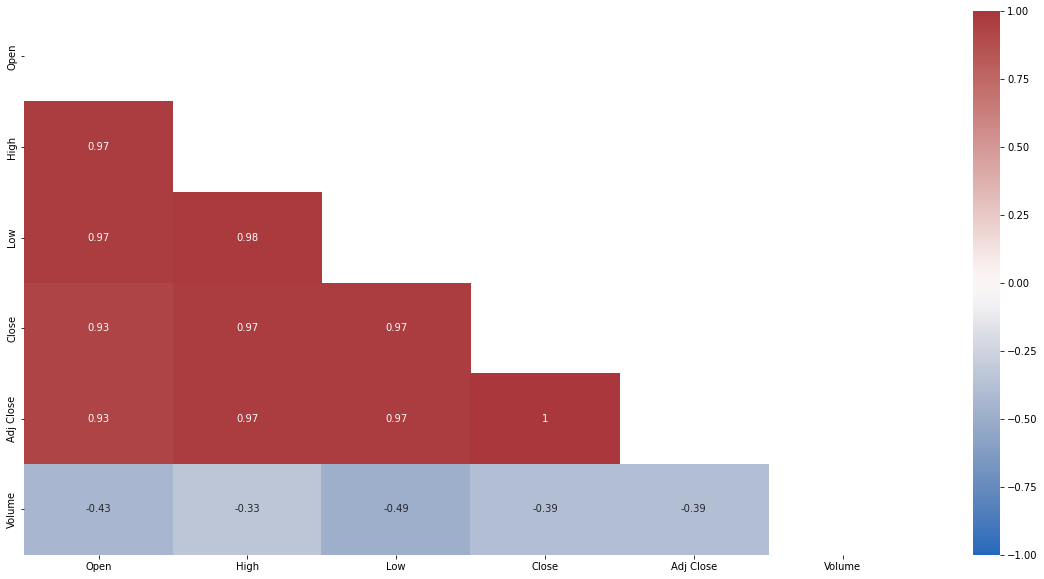

In [ ]:
df = yf.download('BKNG', 
                      start='2000-02-10', 
                      end='2022-02-20', 
                      progress=False,
)
df = yf.download('BKNG', 
                      start='2022-02-21', 
                      end='2022-04-20', 
                      progress=False,
)
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()
matrix = df.corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

In [ ]:
matrix = df.corr()
matrix = matrix.unstack()
matrix = matrix[abs(matrix) >= 0.7]

print(matrix)

Open       Open         1.000000
           High         0.968191
           Low          0.974095
           Close        0.926533
           Adj Close    0.926533
High       Open         0.968191
           High         1.000000
           Low          0.976022
           Close        0.974023
           Adj Close    0.974023
Low        Open         0.974095
           High         0.976022
           Low          1.000000
           Close        0.974849
           Adj Close    0.974849
Close      Open         0.926533
           High         0.974023
           Low          0.974849
           Close        1.000000
           Adj Close    1.000000
Adj Close  Open         0.926533
           High         0.974023
           Low          0.974849
           Close        1.000000
           Adj Close    1.000000
Volume     Volume       1.000000
dtype: float64


In [ ]:
matrix = matrix[matrix < 0]